In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)

print("setup")

setup


**age**: age of the patient (years)

**anaemia:** decrease of red blood cells or hemoglobin (boolean)
creatinine phosphokinase

**(CPK):** level of the CPK enzyme in the blood (mcg/L)

**diabetes:** if the patient has diabetes (boolean)

**ejection fraction:** percentage of blood leaving the heart at each contraction (percentage)

**high blood pressure:** if the patient has hypertension (boolean)

**platelets:** platelets in the blood (kiloplatelets/mL)

**sex:** woman or man (binary)

**serum creatinine:** level of serum creatinine in the blood (mg/dL)

**serum sodium:** level of serum sodium in the blood (mEq/L)

**smoking:** if the patient smokes or not (boolean)

**time:** follow-up period (days)

**DEATH_EVENT:** if the patient died during the follow-up period (boolean)

In [ ]:
#loading the data into dataframe
path = "/content/heart_failure_clinical_records.csv"

def load_data(data_path):
  data = pd.read_csv(path)
  return data


data_frame = load_data(path)
data_frame.info()  #all the data types are int or float and non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [ ]:
#exporing the data more
def explore_multi(data):
  for column in data_frame.columns:
    print(f"{column + ' : ' + str(len(data_frame[column].unique()))} : {data_frame[column].unique()}")
    print()


explore_multi(data_frame)

age : 48 : [55.    65.    45.    60.    95.    70.    63.    50.    53.    60.667
 72.    64.    75.    66.    58.    42.    69.    68.    49.    51.
 44.    59.    90.    61.    46.    80.    56.    41.    85.    82.
 67.    52.    43.    81.    48.    57.    40.    86.    77.    73.
 62.    87.    79.    47.    94.    71.    78.    54.   ]

anaemia : 2 : [0 1]

creatinine_phosphokinase : 290 : [ 748   56  582  754  232  122  171  482  446  151  110 2695 1610  335
   34   99   68   47  103  200  111   67   86 1807 1764   64  220  221
  308  249  211   59   91  371  246  205  245  135  305  757  196   82
   84  102  615  144  106   66   60  121  167 1767  248 2656  154  719
  160  653  281  292  168 7702  118  104  897  145  318  148  936  159
  319   92  112  212   95  328 1896  515  157  291  379  253  260  855
  280  193   96  124  134 1846  146  204   80  617   58 2281  358  180
 1876   78  675  608  407 1071 4540  577  559  181   81 1380  835 1202
  646  117 2794  270  337  128  1

<Axes: >

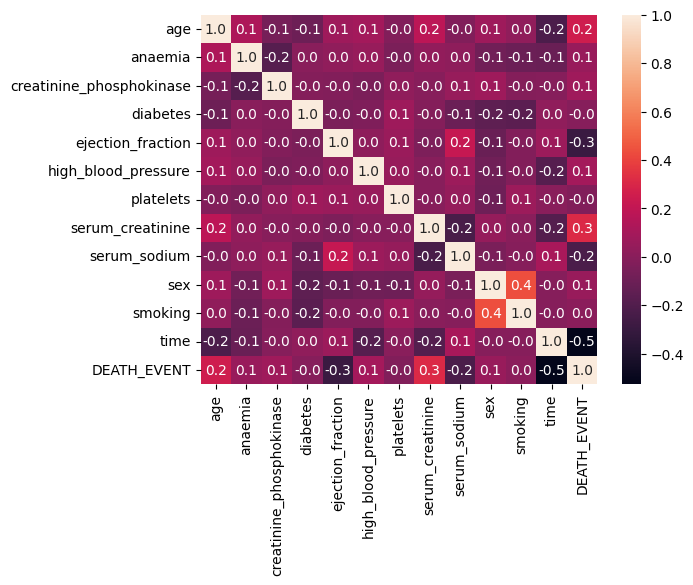

In [ ]:
corr = data_frame.corr()
sns.heatmap(corr, annot=True, fmt=".1f")

1568
3432


<Axes: >

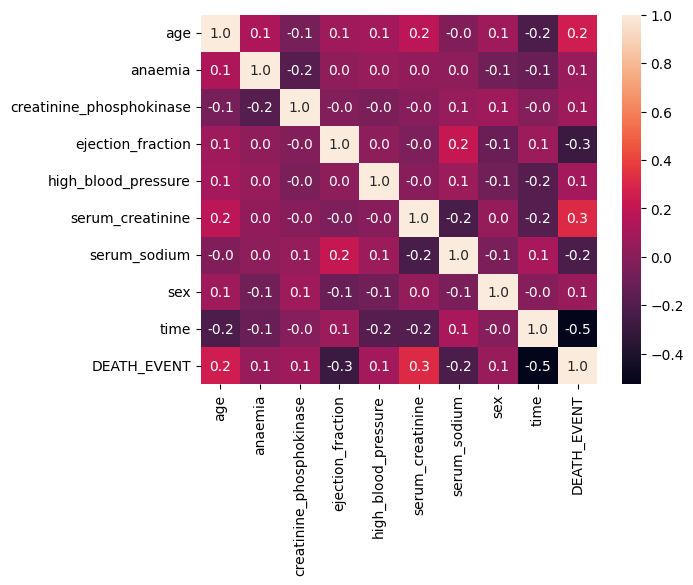

In [ ]:
df_train = data_frame.drop(columns=["smoking", "platelets", "diabetes"], axis=1)

record_death = df_train[df_train["DEATH_EVENT"] == 1]
record_lived = df_train[df_train["DEATH_EVENT"] == 0]

print(len(record_death))
print(len(record_lived))




new_corr = df_train.corr()
sns.heatmap(new_corr, annot=True, fmt=".1f")




In [ ]:
df_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex',
       'time', 'DEATH_EVENT'],
      dtype='object')

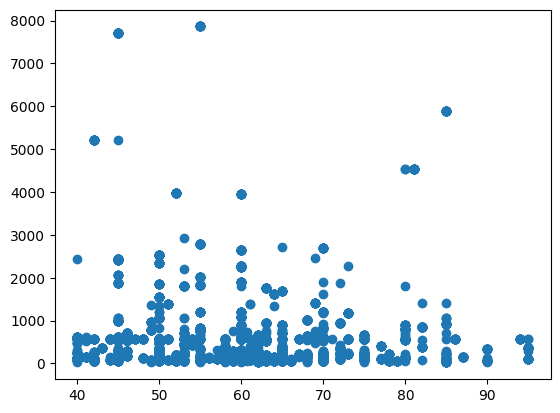

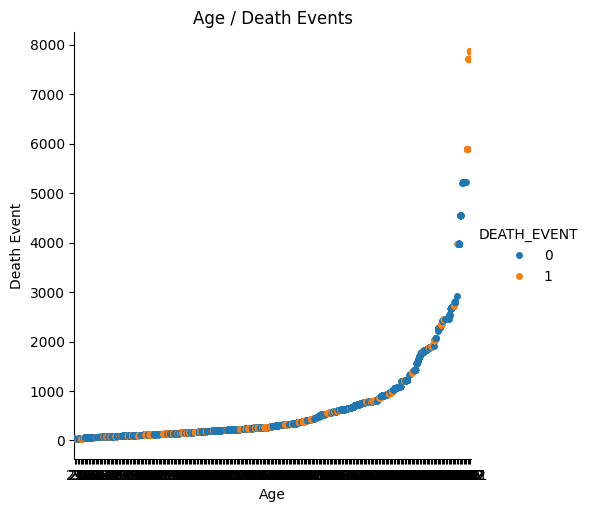

In [ ]:
plt.scatter(x =data_frame["age"], y = data_frame["creatinine_phosphokinase"])
sns.catplot(data=data_frame, x = "creatinine_phosphokinase", y="creatinine_phosphokinase", hue="DEATH_EVENT", kind="strip")
plt.title("Age / Death Events")
plt.xlabel("Age")
plt.ylabel("Death Event")
plt.show()

In [ ]:
#scaling the high valued number
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['DEATH_EVENT'], axis=1)
y = df_train["DEATH_EVENT"]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_train)
scaled_test = scaler.fit_transform(x_test)
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_test_df = pd.DataFrame(scaled_test, columns=X.columns )

scaled_test_df.head()


,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
0,0.439795,1.025936,-0.233224,-0.236207,1.356801,-0.562823,-0.198037,-1.347336,-0.117629
1,1.041453,1.025936,-0.518056,-1.081736,-0.737028,-0.352324,0.710388,0.742205,-0.838909
2,0.869551,1.025936,-0.476280,1.877616,-0.737028,-0.036576,0.029070,-1.347336,-0.511054
3,0.697648,1.025936,0.033884,-1.081736,1.356801,-0.352324,0.256176,0.742205,-1.127420
4,0.869551,-0.974719,0.125030,-0.236207,-0.737028,-0.247075,-0.652249,0.742205,1.521643


In [ ]:
params = {
    "n_estimators": [10, 50, 80, 100, 200],
    "max_depth": [None],
    "criterion": ["gini", "entropy", "log_loss"]
}

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

search = GridSearchCV(model, params, scoring="accuracy", cv=5, refit=True).fit(scaled_data_df, y_train)

print(search.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)


In [ ]:
#training the model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [LogisticRegression, RandomForestClassifier, DecisionTreeClassifier]

def train_model(models, scaled_x, target):
  result = {}
  for model in models:
    modelInstance = model()
    modelInstance.fit(scaled_x, target)
    result[model] = modelInstance
  return result


def validate_scoring(models , x_test, y_test):
  scores = {}
  report = {}
  for model in models.values():
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores[model] = score
    report[model] = classification_report(y_test, y_pred)
  return scores, report


result = train_model(models, scaled_data_df, y_train)
validated = validate_scoring(result, scaled_test_df, y_test)

#scores
for score in validated[0].values():
  print(score)


#validated
for score in validated[1].values():
  print(score)



0.8504
0.9864
0.9448
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       881
           1       0.75      0.75      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.98      0.97      0.98       369

    accuracy                           0.99      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.99      0.99      0.99      1250

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       881
           1       0.92      0.89      0.91       369

    accuracy                           0.94      1250
   macro avg       0.94      0.93      0.93      1250
weighted avg       0.94      0.94      0.94      1250

In [ ]:
# model = LogisticRegression(max_iter=300)
# model.fit(scaled_data_df, y_train)
# y_pred = model.predict(x_test)
# print(accuracy_score(y_test, y_pred))

# print(classification_report(y_test, y_pred))



from sklearn.metrics import mean_squared_error

model = KNeighborsClassifier(n_neighbors=8)
model.fit(scaled_data_df, y_train)
y_pred = model.predict(scaled_test_df)

print(mean_squared_error(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.028
0.972
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       881
           1       0.96      0.95      0.95       369

    accuracy                           0.97      1250
   macro avg       0.97      0.96      0.97      1250
weighted avg       0.97      0.97      0.97      1250



In [ ]:
from sklearn.metrics import mean_squared_error

model = RandomForestClassifier(random_state=42)
model.fit(scaled_data_df, y_train)
y_pred = model.predict(scaled_test_df)

print(mean_squared_error(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.016
0.984
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.98      0.96      0.97       369

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



In [ ]:
#evaluating randomforest and kneighbours
positive_count = 0
diff = 0
print(len(y_pred))
result = y_test.to_numpy()

for i in range(y_test.shape[0]):
  if result[i] == y_pred[i]:
    positive_count += 1

result = len(y_test) - positive_count
print(result)





1250
20


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

new_model = GradientBoostingClassifier(random_state=42, learning_rate=1, n_estimators=100).fit(scaled_data_df, y_train)
score = new_model.score(scaled_test_df, y_test)
print(score)
y_pred = new_model.predict(scaled_test_df)

0.9536


In [ ]:
new_model = AdaBoostClassifier(random_state=42, learning_rate=1, n_estimators=100).fit(scaled_data_df, y_train)
score = new_model.score(scaled_test_df, y_test)
print(score)
y_pred = new_model.predict(scaled_test_df)

0.8672


In [ ]:
from sklearn.svm import SVC

new_model = SVC(kernel="linear", gamma=2).fit(scaled_data_df, y_train)
score = new_model.score(scaled_test_df, y_test)
print(score)
y_pred = new_model.predict(scaled_test_df)

0.8512
